In [1]:
from sympy.abc import x,y
from sympy import Matrix, solve, simplify
from sympy.tensor.array import derive_by_array

In [2]:
from sympy import init_printing
init_printing()

In [3]:
R = (1-x)**2 + (y-x**2)**2
def RR(x,y): return (1-x)**2 + (y-x**2)**2
f = Matrix(derive_by_array(R, [x,y]))
A = Matrix(2,2,derive_by_array(f, [x,y]))
B = A.inv()

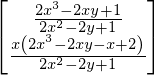

In [4]:
G = Matrix([x,y])-B*f
simplify(G)

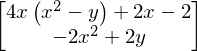

In [5]:
simplify(f)

In [6]:
def recursive_output(x0,y0,steps):
    output  = "\\begin{tabular}{|c|c|c|} \\hline \n"
    output += "$n$ & $x_n$ & $y_n$ \\\\ \hline \hline \n"
    output += ("$0$ & $%1.8f$ & $%1.8f$ \\\\ \\hline \n" % (x0, y0))
    for step in range(steps):
        xn,yn=G.subs({x:x0, y:y0})
        output += ("$%d$ & $%1.8f$ & $%1.8f$ \\\\ \\hline \n" % (step+1, xn, yn))
        x0,y0=xn,yn
    output += "\end{tabular}"
    return output

In [7]:
print(recursive_output(-2,2,9))

\begin{tabular}{|c|c|c|} \hline 
$n$ & $x_n$ & $y_n$ \\ \hline \hline 
$0$ & $-2.00000000$ & $2.00000000$ \\ \hline 
$1$ & $-1.40000000$ & $1.60000000$ \\ \hline 
$2$ & $-0.00465116$ & $-1.94697674$ \\ \hline 
$3$ & $0.20063119$ & $-0.00188797$ \\ \hline 
$4$ & $0.93786471$ & $0.33607695$ \\ \hline 
$5$ & $0.96763687$ & $0.93543474$ \\ \hline 
$6$ & $0.99994273$ & $0.99884179$ \\ \hline 
$7$ & $0.99999988$ & $0.99999976$ \\ \hline 
$8$ & $1.00000000$ & $1.00000000$ \\ \hline 
$9$ & $1.00000000$ & $1.00000000$ \\ \hline 
\end{tabular}


In [8]:
def recursive(x0,y0,steps):
    outputx = [x0]
    outputy = [y0]
    for step in range(steps):
        xn,yn = G.subs({x:x0, y:y0})
        outputx.append(xn)
        outputy.append(yn)
        x0,y0 = xn,yn
    return outputx, outputy

In [9]:
ox1,oy1=recursive(3.5,2.1,7)
ox2,oy2=recursive(-3.9,-2.3,9)
ox3,oy3 = recursive(-2,2,6)



In [10]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.xkcd();

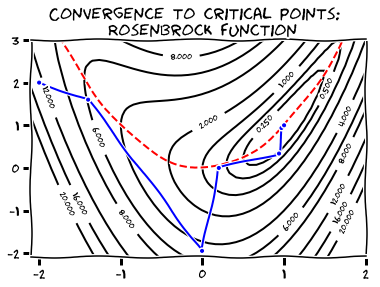

In [13]:
x = np.linspace(-2.1,2)
y = np.linspace(-2.1,3)
X,Y = np.meshgrid(x,y)

plt.figure()
# plt.axes(aspect='equal')

CS = plt.contour(X, Y, RR(X,Y), levels=[0.25,0.5,1,2,4,6,8,12,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
#plt.plot(ox1,oy1,'r')
#plt.plot(ox1,oy1,'or')
#plt.plot(ox2,oy2,'b')
#plt.plot(ox2,oy2,'ob')
plt.plot(x,x**2,'r--')
plt.plot(ox3,oy3,'b.-')
plt.xlim(-2.1,2)
plt.ylim(-2.1,3)
plt.title("Convergence to critical points: \n Rosenbrock function")
plt.show()